In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
descriptors = []
filenames = []
orb = cv.ORB_create()
for filename in os.listdir('GoogleLandmarksV2'):
    f = os.path.join('GoogleLandmarksV2', filename)
    if os.path.isfile(f):
        img = cv.imread(f, cv.IMREAD_GRAYSCALE)
        kp, des = orb.detectAndCompute(img, None)
        if des is not None:
            if len(des) > 20:
                descriptors.append(des)
                filenames.append(f)

In [3]:
np.save('ORBdescriptors', np.asanyarray(descriptors, dtype = object), allow_pickle = True, fix_imports = True)
np.save('ORBfilenames', np.asanyarray(filenames, dtype = object), allow_pickle = True, fix_imports = True)

In [4]:
descriptors = np.load('ORBdescriptors.npy', mmap_mode = None, allow_pickle=True, fix_imports=True)
filenames = np.load('ORBfilenames.npy', mmap_mode = None, allow_pickle=True, fix_imports=True)

In [5]:
orb = cv.ORB_create()
inputImg = cv.imread('query.jpg')
queryImg = cv.cvtColor(inputImg, cv.COLOR_BGR2GRAY)
kp, descriptors_query = orb.detectAndCompute(queryImg, None)

In [6]:
similarity_scores = []
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
for i in range(len(descriptors)):
    matches = bf.match(descriptors_query, descriptors[i])
    similar_regions = [j for j in matches if j.distance < 50]  
    if len(matches) == 0:
         similarity = 0
    else:
        similarity = len(similar_regions) / len(matches)
    similarity_scores.append((similarity, filenames[i]))    
similarity_scores.sort(reverse = True)

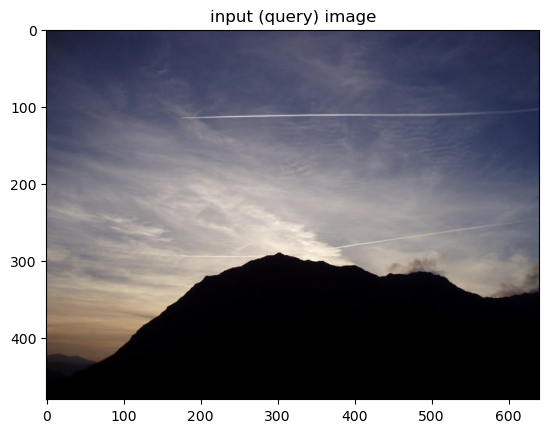

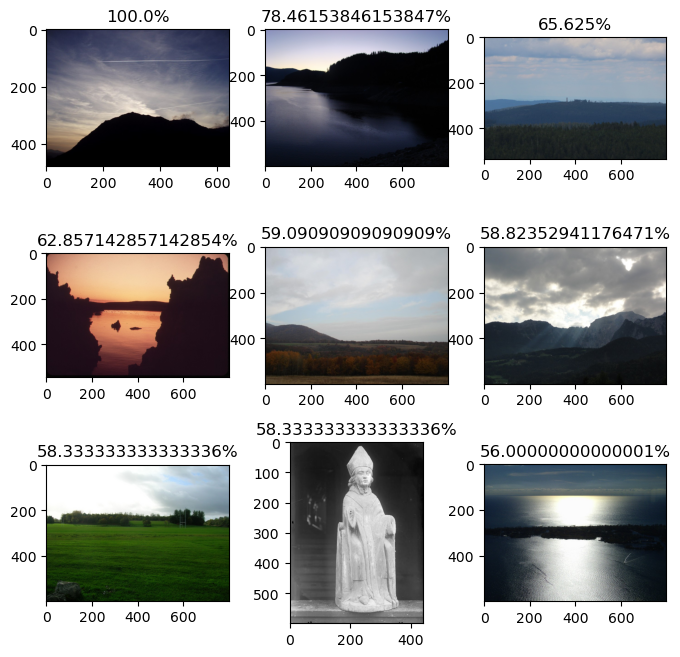

In [7]:
plt.imshow(cv.cvtColor(inputImg, cv.COLOR_BGR2RGB), cmap = 'gray')
plt.title("input (query) image")
plt.show()
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows + 1):
    image = cv.imread(similarity_scores[i-1][1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap = 'gray')
    plt.title(str(similarity_scores[i-1][0]*100) + "%")
plt.show()